
<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:50%;color:blue;text-align:center">    <FONT COLOR="blue">  
            Detección de texto sensible </p> desde el LLM hacia el usuario       </FONT>         </h1>
        </td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">  </p> ARQUITECTURA DE PROTECCIÓN DE PRIVACIDAD  </p> DE DATOS PARA MODELOS DE LENGUAJE DE GRAN TAMAÑO (LLM) USANDO CHATGPT </p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría MACC 2025</p></tp>
            <tp><p style="font-size:115%;text-align:center">Sofia Bonilla - Danna Ocampo - Daniel Lopez - Pedro Wightman</p></tp>
        </td>
    </tr>
</table>



<FONT SIZE=4 COLOR="green"> Instalación de bibliotecas y herramientas necesarias



<FONT SIZE=2 COLOR="black"> -> transformers:
Es una biblioteca de Hugging Face que proporciona modelos preentrenados para tareas de procesamiento de lenguaje natural (NLP)

<FONT SIZE=2 COLOR="black"> -> openai: Esta es la biblioteca oficial de OpenAI que permite interactuar con los modelos de OpenAI, como GPT

<FONT SIZE=2 COLOR="black"> -> datasets: Esta blioteca es muy útil para gestionar datasets en proyectos de procesamiento de lenguaje natural (NLP)

In [ ]:
# Instalar las librerías
!pip install transformers
!pip install openai
!pip install openai==0.28
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.59.3
    Uninstalling openai-1.59.3:
      Successfully uninstalled openai-1.59.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires 

<FONT SIZE=4 COLOR="green"> Importación de bibliotecas

In [ ]:
import openai  # Interactúa con la API de OpenAI para generar respuestas.
import re  # Proporciona funciones para trabajar con expresiones regulares.
import random  # Genera números y selecciones aleatorias.
import pandas as pd  # Manejo de datos estructurados (como tablas y DataFrames).
from sklearn.model_selection import train_test_split  # Divide datos en conjuntos de entrenamiento y prueba.
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc  # Métricas de evaluación de modelos.
from sklearn.preprocessing import label_binarize  # Convierte etiquetas en formato binarizado (por ejemplo, para ROC).
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
# DistilBERT: Tokenizador y modelo para clasificación de texto, y herramientas para entrenamiento.

import torch  # Framework para cálculos en tensores y aprendizaje profundo.
from datasets import Dataset  # Manejo eficiente de datasets grandes para tareas de NLP.
import matplotlib.pyplot as plt  # Generación de gráficos y visualizaciones.
import seaborn as sns  # Visualización de datos con gráficos estilizados (por ejemplo, mapas de calor).


<FONT SIZE=4 COLOR="green"> API Key de OPENAI

In [ ]:
openai.api_key = 'sk-proj-QmMFnqijmb98iKSWmcF5T3BlbkFJySuWHSxZ0wNhJcfKP0xn'

<FONT SIZE=4 COLOR="green"> Carga de datos en formato csv

In [ ]:
frases_sensible = pd.read_csv("/content/archivo_separado_sensible.csv")
frases_no_sensibles = pd.read_csv("/content/archivo_separado_no_sensible.csv")

# Unir los datasets
dataset_llm_usuario1 = pd.concat([frases_sensible, frases_no_sensibles], ignore_index=True)

# Mostrar las columnas
print("Columnas del dataset:")
print(dataset_llm_usuario1.columns)

# Mostrar la cantidad de registros
print("\nCantidad de registros en el dataset:", len(dataset_llm_usuario1))

# Mostrar el head con los 10 primeros registros
print("\nPrimeros 10 registros:")
print(dataset_llm_usuario1.head(10))
dataset_llm_usuario1.to_csv("dataset_llm_usuario1.csv", index=False)
df=dataset_llm_usuario1


Columnas del dataset:
Index(['frase', 'etiqueta'], dtype='object')

Cantidad de registros en el dataset: 11520

Primeros 10 registros:
                                               frase  \
0  El correo electrÃ³nico de Osvaldo MariÃ±o PiÃ±...   
1  Empleado con ID aff99236-6876-4e63-87bb-cc6105...   
2  El correo electrÃ³nico de Matilde Cabrero Lore...   
3  CÃ³digo de seguridad: c36ca4b2-4439-474a-9c9c-...   
4  CÃ³digo de seguridad: 0084199a-bde3-4cd3-998d-...   
5             NÃºmero de identificaciÃ³n 595-32-9466   
6  El correo electrÃ³nico de Juan Gallo es avilab...   
7  Cuenta bancaria 49174116111879512884 asociada ...   
8         DirecciÃ³n: Via Julie Prado 13 en La Rioja   
9  Empleado con ID 4d373c96-cc22-480f-975d-ce18fa...   

                          etiqueta  
0                                1  
1                                1  
2                                1  
3                                1  
4                                1  
5                         

<FONT SIZE=4 COLOR="green"> División de datos

In [ ]:
# Dividir el dataset en 80% entrenamiento y 20% prueba
X = df['frase']
y = df['etiqueta']

# Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear los DataFrames de los conjuntos de entrenamiento y prueba
train_df = pd.DataFrame({'frase': X_train, 'etiqueta': y_train})
test_df = pd.DataFrame({'frase': X_test, 'etiqueta': y_test})

# Guarda los DataFrames en archivos CSV
train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

# Mostrar los datasets
print("Conjunto de entrenamiento:")
print(train_df.head())

print("\nConjunto de prueba:")
print(test_df.head())


Conjunto de entrenamiento:
                                                   frase etiqueta
11473  Sandra es muy buena en su trabajo y siempre bu...        0
782    Cuenta bancaria 68735012499737871613 asociada ...        1
4080              Clave de acceso temporal: 0M9)_Gcrw^vR        1
1156   Tarjeta de crÃ©dito 6504242788142822 a nombre ...        1
1536              NÃºmero de identificaciÃ³n 658-00-0960        1

Conjunto de prueba:
                                                   frase etiqueta
1078              Clave de acceso temporal: !5iqYCjl9s+U        1
9315                        El rÃ­o brilla intensamente.        0
3299              Clave de acceso temporal: ((&YHaQ(zN6T        1
7894                           Miro las luz en el cielo.        0
11037  El aprendizaje es un proceso que continÃºa tod...        0


<FONT SIZE=4 COLOR="green"> Tokenización, configuración y entrenamiento del modelo.

*  DistilBertTokenizer: Es una clase de Hugging Face que convierte texto en una secuencia de tokens (números) que el modelo DistilBERT puede procesar.
*  from_pretrained('distilbert-base-uncased'): Carga el tokenizador asociado al modelo preentrenado distilbert-base-uncased.
*  distilbert-base-uncased: Significa que el texto de entrada se convertirá todo a minúsculas y no distinguirá entre mayúsculas y minúsculas.


In [ ]:
# Preparar el tokenizador y el modelo de DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

# Tokenización de los conjuntos de entrenamiento y prueba
train_encodings = tokenizer(train_df['frase'].tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_df['frase'].tolist(), truncation=True, padding=True, max_length=128)

train_df['etiqueta'] = pd.to_numeric(train_df['etiqueta'], errors='coerce').fillna(0).astype('int64')
test_df['etiqueta'] = pd.to_numeric(test_df['etiqueta'], errors='coerce').fillna(0).astype('int64')



train_labels = torch.tensor(train_df['etiqueta'].values)
test_labels = torch.tensor(test_df['etiqueta'].values)


# Crear datasets para el modelo de Hugging Face
train_dataset = Dataset.from_dict({'input_ids': train_encodings['input_ids'],
                                   'attention_mask': train_encodings['attention_mask'],
                                   'labels': train_labels})

test_dataset = Dataset.from_dict({'input_ids': test_encodings['input_ids'],
                                  'attention_mask': test_encodings['attention_mask'],
                                  'labels': test_labels})

# Definir los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="epoch"
)

# Configurar el entrenador
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Entrenar el modelo
trainer.train()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,0.032800,0.007828
2,0.017800,0.006995
3,0.006600,0.017505
4,0.000000,0.012855
5,0.001000,0.012343


TrainOutput(global_step=5760, training_loss=0.02079963232261232, metrics={'train_runtime': 20156.0554, 'train_samples_per_second': 2.286, 'train_steps_per_second': 0.286, 'total_flos': 727246018621440.0, 'train_loss': 0.02079963232261232, 'epoch': 5.0})

<FONT SIZE=4 COLOR="green">Evaluación del modelo -> Métricas

Preprocesamiento del Dataset de Validación Tokenización de las frases en el conjunto de validación:

El modelo DistilBERT no puede procesar texto directamente; necesita que las frases estén transformadas en una representación numérica. Para ello, usamos un tokenizador. Este proceso convierte cada palabra en números y agrega información adicional (como attention_mask), que ayuda al modelo a saber cuáles palabras debe prestar atención y cuáles puede ignorar (por ejemplo, relleno o "padding" en secuencias cortas). En el código, usamos el tokenizador para transformar el texto de frases_validation:

Conversión de etiquetas en tensores de PyTorch:

Los modelos de Hugging Face requieren que las etiquetas también estén en un formato específico, en este caso en un tensor de torch. Convertimos las etiquetas (1 para frases sensibles y 0 para frases no sensibles) a un tensor:

In [ ]:
# Guardar el modelo después del entrenamiento
trainer.save_model("./results")
# Cargar el dataset de validación
df_validation = pd.read_csv('validacion.csv')

# Verificar que 'frase' contiene texto y 'etiqueta' tiene valores numéricos
df_validation['frase'] = df_validation['frase'].astype(str)  # Asegurarse de que las frases sean cadenas
df_validation['etiqueta'] = df_validation['etiqueta'].astype(int)  # Asegurarse de que las etiquetas sean enteros

# Cargar el tokenizador y el modelo previamente entrenado
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('./results')  # Ruta donde guardaste el modelo entrenado

# Preprocesar el conjunto de validación
validation_encodings = tokenizer(df_validation['frase'].tolist(), truncation=True, padding=True, max_length=128)

# Convertir las etiquetas a tensores de torch
validation_labels = torch.tensor(df_validation['etiqueta'].values)

# Crear el dataset de validación para Hugging Face
validation_dataset = Dataset.from_dict({
    'input_ids': validation_encodings['input_ids'],
    'attention_mask': validation_encodings['attention_mask'],
    'labels': validation_labels
})

# Configurar el Trainer solo para evaluación
trainer = Trainer(model=model)

# Evaluar en el conjunto de validación
predictions = trainer.predict(validation_dataset)
predicted_labels = predictions.predictions.argmax(axis=1)  # Obtener las etiquetas predichas

# Generar y mostrar el informe de clasificación
print("Informe de clasificación en el conjunto de validación:")
print(classification_report(validation_labels, predicted_labels))


Informe de clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       493
           1       0.99      0.81      0.89       493

    accuracy                           0.90       986
   macro avg       0.91      0.90      0.90       986
weighted avg       0.91      0.90      0.90       986



<FONT SIZE=4 COLOR="green">Evaluación del modelo -> Gráficas

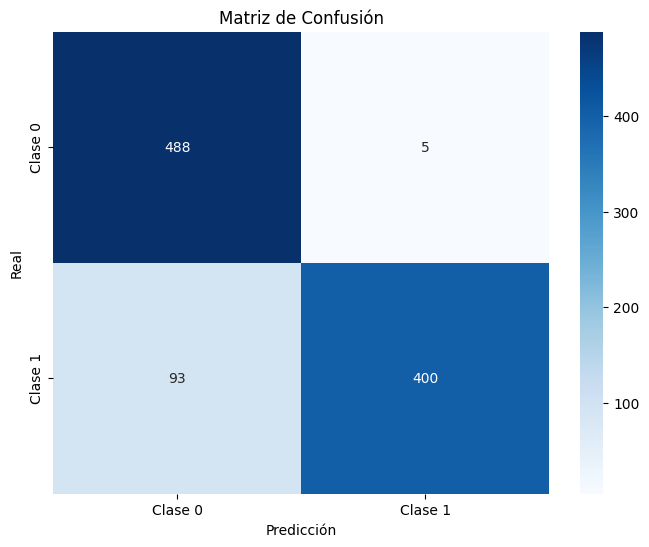

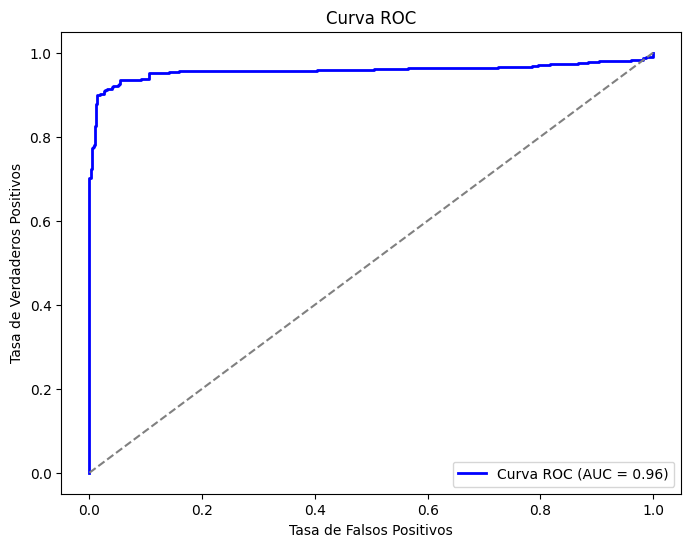

In [ ]:
# Matriz de Confusión
conf_matrix = confusion_matrix(validation_labels, predicted_labels)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

# Curva ROC y AUC (Área Bajo la Curva)
# Binarizamos las etiquetas (esto es necesario para la curva ROC en tareas de clasificación binaria)
validation_labels_bin = label_binarize(validation_labels, classes=[0, 1])

# Calcular las probabilidades de predicción de cada clase
predicted_probs = predictions.predictions[:, 1]  # Probabilidades de la clase positiva (1)

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(validation_labels_bin, predicted_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.show()

<FONT SIZE=4 COLOR="green"> Función de detección para patrones especificos

La función detect_sensitive_info(text) busca patrones específicos en un texto para identificar información sensible, como correos electrónicos, números de tarjetas de crédito, teléfonos, identificaciones, direcciones, fechas de nacimiento, datos médicos o bancarios. Utiliza expresiones regulares (re.search) para detectar cada uno de estos patrones y devuelve True si encuentra algún dato sensible; de lo contrario, retorna False.

<FONT SIZE=4 COLOR="green"> Función de ofuscación

La función obfuscate(text) está diseñada para ofuscar (es decir, ocultar parcialmente) información sensible dentro de un texto, mientras se mantiene visible una parte relevante de los datos. Esto se logra mediante el uso de expresiones regulares para encontrar patrones específicos.

In [ ]:
# Funciones de detección y ofuscación
def detect_sensitive_info(text):
    email_pattern = r'\b\w+@\w+\.\w+\b'
    if re.search(email_pattern, text):
        return True
    credit_card_pattern = r'\b\d{4}[- ]?\d{4}[- ]?\d{4}[- ]?\d{4}\b'
    if re.search(credit_card_pattern, text):
        return True
    phone_pattern = r'\b\d{1,3}[- ]?\d{1,3}[- ]?\d{1,4}\b'
    if re.search(phone_pattern, text):
        return True
    id_pattern = r'\b\d{8,9}\b'
    if re.search(id_pattern, text):
        return True
    address_pattern = r'\b\d+\s\w+\s\w+\b'
    if re.search(address_pattern, text):
        return True
    dob_pattern = r'\b\d{1,2}[/-]\d{1,2}[/-]\d{2,4}\b'
    if re.search(dob_pattern, text):
        return True
    medical_record_pattern = r'\b\d{10,12}\b'
    if re.search(medical_record_pattern, text):
        return True
    bank_account_pattern = r'\b\d{10,12}\b'
    if re.search(bank_account_pattern, text):
        return True
    return False



def obfuscate(text):
    # Ofuscar números de tarjetas de crédito
    text = re.sub(r'\b(\d{4})([- ]?\d{4}){3}\b', lambda m: f"{m.group(1)}-****-****-{m.group(0)[-4:]}", text)
    # Ofuscar números de teléfono
    text = re.sub(r'\b(\d{1,3})[- ]?(\d{1,3})[- ]?(\d{1,4})\b', lambda m: f"****-****-{m.group(3)}", text)
    # Ofuscar correos electrónicos
    text = re.sub(r'(\w)(\w+?)(@\w+\.\w+)', lambda m: f"{m.group(1)}{'*' * len(m.group(2))}{m.group(3)}", text)
    # Ofuscar contraseñas
    text = re.sub(r'\b(?:contraseña|clave):?\s*(\w{6,})\b', lambda m: f"{m.group(0).split(':')[0]}: {obfuscate_password(m.group(1))}", text)
    # Ofuscar números genéricos
    text = re.sub(r'\b(?!número)(\d+)\b', lambda m: obfuscate_number(m.group(0)), text)

    # Permutar nombres (puedes ajustar este patrón para otros datos sensibles)
    text = re.sub(r'\b([A-Z][a-z]+(?:\s[A-Z][a-z]+)*)\b', lambda m: permute(m.group(0)), text)
    return text

def obfuscate_password(password):
    length = len(password)
    if length <= 2:
        return password
    keep_count = max(1, length // 5)
    obfuscated = '*' * (length - keep_count) + password[-keep_count:]
    return obfuscated

def obfuscate_number(number):
    length = len(number)
    if length <= 2:
        return number
    keep_count = max(1, length // 5)
    obfuscated = '*' * (length - keep_count) + number[-keep_count:]
    return obfuscated

def permute(text):
    words = text.split()
    permuted_words = []
    for word in words:
        if len(word) > 3:  # Solo permutar palabras largas
            word = list(word)
            random.shuffle(word)
            permuted_word = ''.join(word)
            permuted_words.append(permuted_word)
        else:
            permuted_words.append(word)
    return ' '.join(permuted_words)

# Ejemplo de uso
text = "Mi nombre es Juan Pérez y mi correo es juan.perez@example.com"
obfuscated_text = obfuscate(text)
print(obfuscated_text)

Mi nombre es aunJ Pérez y mi correo es juan.p****@example.com


<FONT SIZE=4 COLOR="green"> Función de predicción

In [ ]:
# Función para predecir si el texto contiene información sensible usando el modelo DistilBERT
def predict_sensitive_info(text):
    # Tokenizar el texto para el modelo
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    # Obtener la salida del modelo
    with torch.no_grad():
        outputs = model(**inputs)
    # Obtener la predicción (0 o 1)
    prediction = torch.argmax(outputs.logits, dim=1).item()
    return prediction == 1  # True si el texto es sensible

#Proceso de Clasificación y Ofuscación:

Una vez que tienes la respuesta de ChatGPT (chatgpt_response), el programa la clasifica usando predict_sensitive_info y detect_sensitive_info. Si DistilBERT o la función de detección de patrones encuentran información sensible, el texto se ofusca. Finalmente, el programa muestra la respuesta ofuscada si contiene información sensible y también indica si el texto original contenía información sensible según los filtros aplicados. Este flujo asegura que ambos métodos de detección (modelo de DistilBERT y patrones específicos) contribuyen a mejorar la detección y ofuscación de datos sensibles en la respuesta.

In [ ]:
# Proceso de interacción con el usuario
def process_user_input():
    while True:
        user_input = input("Ingresa una solicitud de información (o escribe 'salir' para terminar): ")

        if user_input.lower() == 'salir':
            print("Saliendo del programa.")
            break

        # Generar respuesta de ChatGPT
        response = openai.ChatCompletion.create(
            model="gpt-4",
            messages=[{"role": "user", "content": user_input}]
        )
        chatgpt_response = response['choices'][0]['message']['content']

        # Usar DistilBERT para verificar si la respuesta contiene información sensible
        is_sensitive_distilbert = predict_sensitive_info(chatgpt_response)

        # Usar el filtro adicional para detectar patrones sensibles específicos
        is_sensitive_pattern = detect_sensitive_info(chatgpt_response)

        # Ofuscar la respuesta si se detecta información sensible
        if is_sensitive_distilbert or is_sensitive_pattern:
            obfuscated_response = obfuscate(chatgpt_response)
        else:
            obfuscated_response = chatgpt_response

        # Mostrar la respuesta y el estado de sensibilidad
        print(f"Respuesta de ChatGPT: {obfuscated_response}")
        print(f"¿Contiene información sensible? {'Sí' if is_sensitive_distilbert or is_sensitive_pattern else 'No'}")

# Ejecutar el proceso de entrada de usuario
process_user_input()

Ingresa una solicitud de información (o escribe 'salir' para terminar): Necesito una frase que contenga un teléfono de contacto para una persona llamada Juan López.
Respuesta de ChatGPT: arPa cualquier consulta, puedes contactar a unaJ López en su teléfono de contacto: +****-****-**7-****-****-0.
¿Contiene información sensible? Sí
Ingresa una solicitud de información (o escribe 'salir' para terminar): Necesito una frase que contenga un correo electrónico de contacto 
Respuesta de ChatGPT: "arPa cualquier consulta o información adicional, por favor no dudes en contactarnos a nuestro correo electrónico s******@empresa.com."
¿Contiene información sensible? Sí
Ingresa una solicitud de información (o escribe 'salir' para terminar): "Dame el número de tarjeta de crédito de Ana Ruiz."
Respuesta de ChatGPT: Lo siento, pero no puedo asistir con eso.
¿Contiene información sensible? No
Ingresa una solicitud de información (o escribe 'salir' para terminar): Pon una clave para una persona llamada C